# Pengenalan Pola

## Lab 2: Gradient Descent

Modul ini bertujuan untuk membantu Anda dalam pemahaman metode optimasi numerik dengan menggunakan gradient descent. Contoh kasus yang diberikan adalah dengan fungsi kuadrat yang bersifat konveks, i.e. punya satu titik optimum. Untuk regresi linear dan regresi logistik, Anda dapat melihat modul Data Mining [Lab 3: Model Linear](http://nbviewer.jupyter.org/github/aliakbars/uai-dm/blob/master/scripts/lab3.ipynb).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

sns.set_context('talk')

In [2]:
def error(w):
    return w**2

w = np.linspace(-5,5,100) # definisi nilai w yang mungkin
y = error(w) # E(w)

## Mencari Gradien

Jika diberikan fungsi $E(w) = w^2$, maka nilainya akan optimum saat turunan pertama, i.e.

$$
\frac{dE(w)}{dw} = 0
$$

dengan fungsi di turunan pertama adalah

$$
\frac{dE(w)}{dw} = 2w
$$

Dengan demikian, nilai $w$ akan diperbaiki secara iteratif mengikuti

$$
w \leftarrow w - \eta \frac{dE(w)}{dw}
$$

atau

$$
w \leftarrow w - \eta 2w
$$

dengan $\eta$ adalah *learning rate* yang umumnya bernilai $[0, 1]$.

## Hampiran Turunan dengan Limit

Ingat bahwa gradien di suatu titik $a$ dapat dilihat sebagai limit sedemikian sehingga

$$
E^{\prime}(a) = \lim_{h \rightarrow 0} \frac{E(a+h)-E(a)}{h}
$$

dan garis singgungnya akan memenuhi persamaan

$$
y = E(a) + E^{\prime}(a)(x-a)
$$

In [3]:
a = 4
h = 1e-5

x = np.array([2.5,3,5.5])
oprime = (error(a+h)-error(a))/h
tan = error(a) + oprime * (x-a)

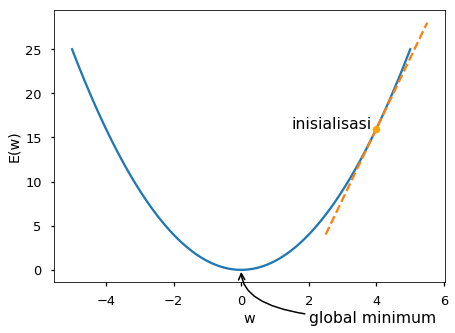

In [4]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(w, y, zorder=1)
ax.scatter([4], [error(4)], c='orange', s=50, zorder=2) # titik awal
ax.plot(x, tan, linestyle='--', zorder=1) # gradien
ax.annotate('inisialisasi', (1.5, error(4)))
ax.annotate('global minimum', xy=(0, 0), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->", linewidth=1.5,
                            connectionstyle="angle3,angleA=0,angleB=-90"));

ax.set_ylabel('E(w)')
ax.set_xlabel('w');

## Gradient Descent dalam Dimensi Tinggi

Tujuan kita dalam melakukan *gradient descent* adalah mencapai nilai global minimum dari titik inisialisasi yang ditentukan secara acak. Untuk lebih dari satu dimensi $w$, gradiennya bisa dihitung dengan turunan parsial sehingga nilai $w$ yang baru untuk dimensi ke-$d$ adalah

$$
w_d \leftarrow w_d - \eta \frac{\partial E(\mathbf{w})}{\partial w_d}
$$

atau terkadang ditulis sebagai

$$
\mathbf{w} \leftarrow \mathbf{w} - \eta \nabla_{\mathbf{w}} E(\mathbf{w})
$$

Jika diberikan fungsi error $E(\mathbf{w}) = w_1^2 + w_2^2$, maka

$$
w_1 \leftarrow w_1 - \eta \frac{\partial E(\mathbf{w})}{\partial w_1}
$$

atau

$$
w_1 \leftarrow w_1 - \eta 2w_1
$$

Demikian pula halnya dengan $w_2$.

In [32]:
eta = 0.05 # learning rate
w1 = -6 # inisialisasi
w2 = 6 # inisialisasi

def sgd(w, epoch=50):
    w_all = [w]

    for i in range(epoch):
        w = w - eta * 2*w
        w_all.append(w)

    return np.array(w_all) # menghasilkan setiap titik perubahan w

In [33]:
w1_all = sgd(w1)
w2_all = sgd(w2)

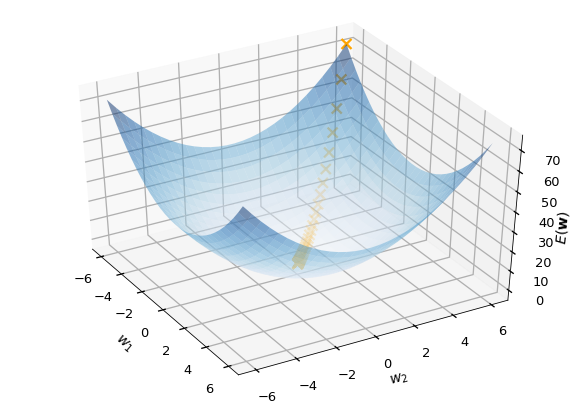

In [38]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.view_init(40, -30)

def f(x, y): # fungsi error
    return x**2 + y**2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ew = f(w1_all, w2_all)
ax.scatter3D(w1_all, w2_all, ew, s=100, marker='x', color='orange');

ax.plot_surface(X, Y, Z, cmap='Blues', alpha=0.5)
ax.set_xlabel('$w_1$', labelpad=15)
ax.set_ylabel('$w_2$', labelpad=15)
ax.set_zlabel('$E(\mathbf{w})$', labelpad=5);

Tanda silang berwarna jingga di atas adalah perubahan nilai $E(\mathbf{w})$ untuk setiap perubahan nilai $w_1$ dan $w_2$ dengan metode *gradient descent*. Apa yang terjadi jika nilai $\eta$ kita perbesar? Apa pula yang terjadi jika nilai $\eta$ diperkecil? Seperti apa pengaruh jumlah epoch pada titik akhir yang dicapai?